In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']  = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#Load data

In [3]:
df = pd.read_csv('Mall_Data.csv', index_col=0)
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [4]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

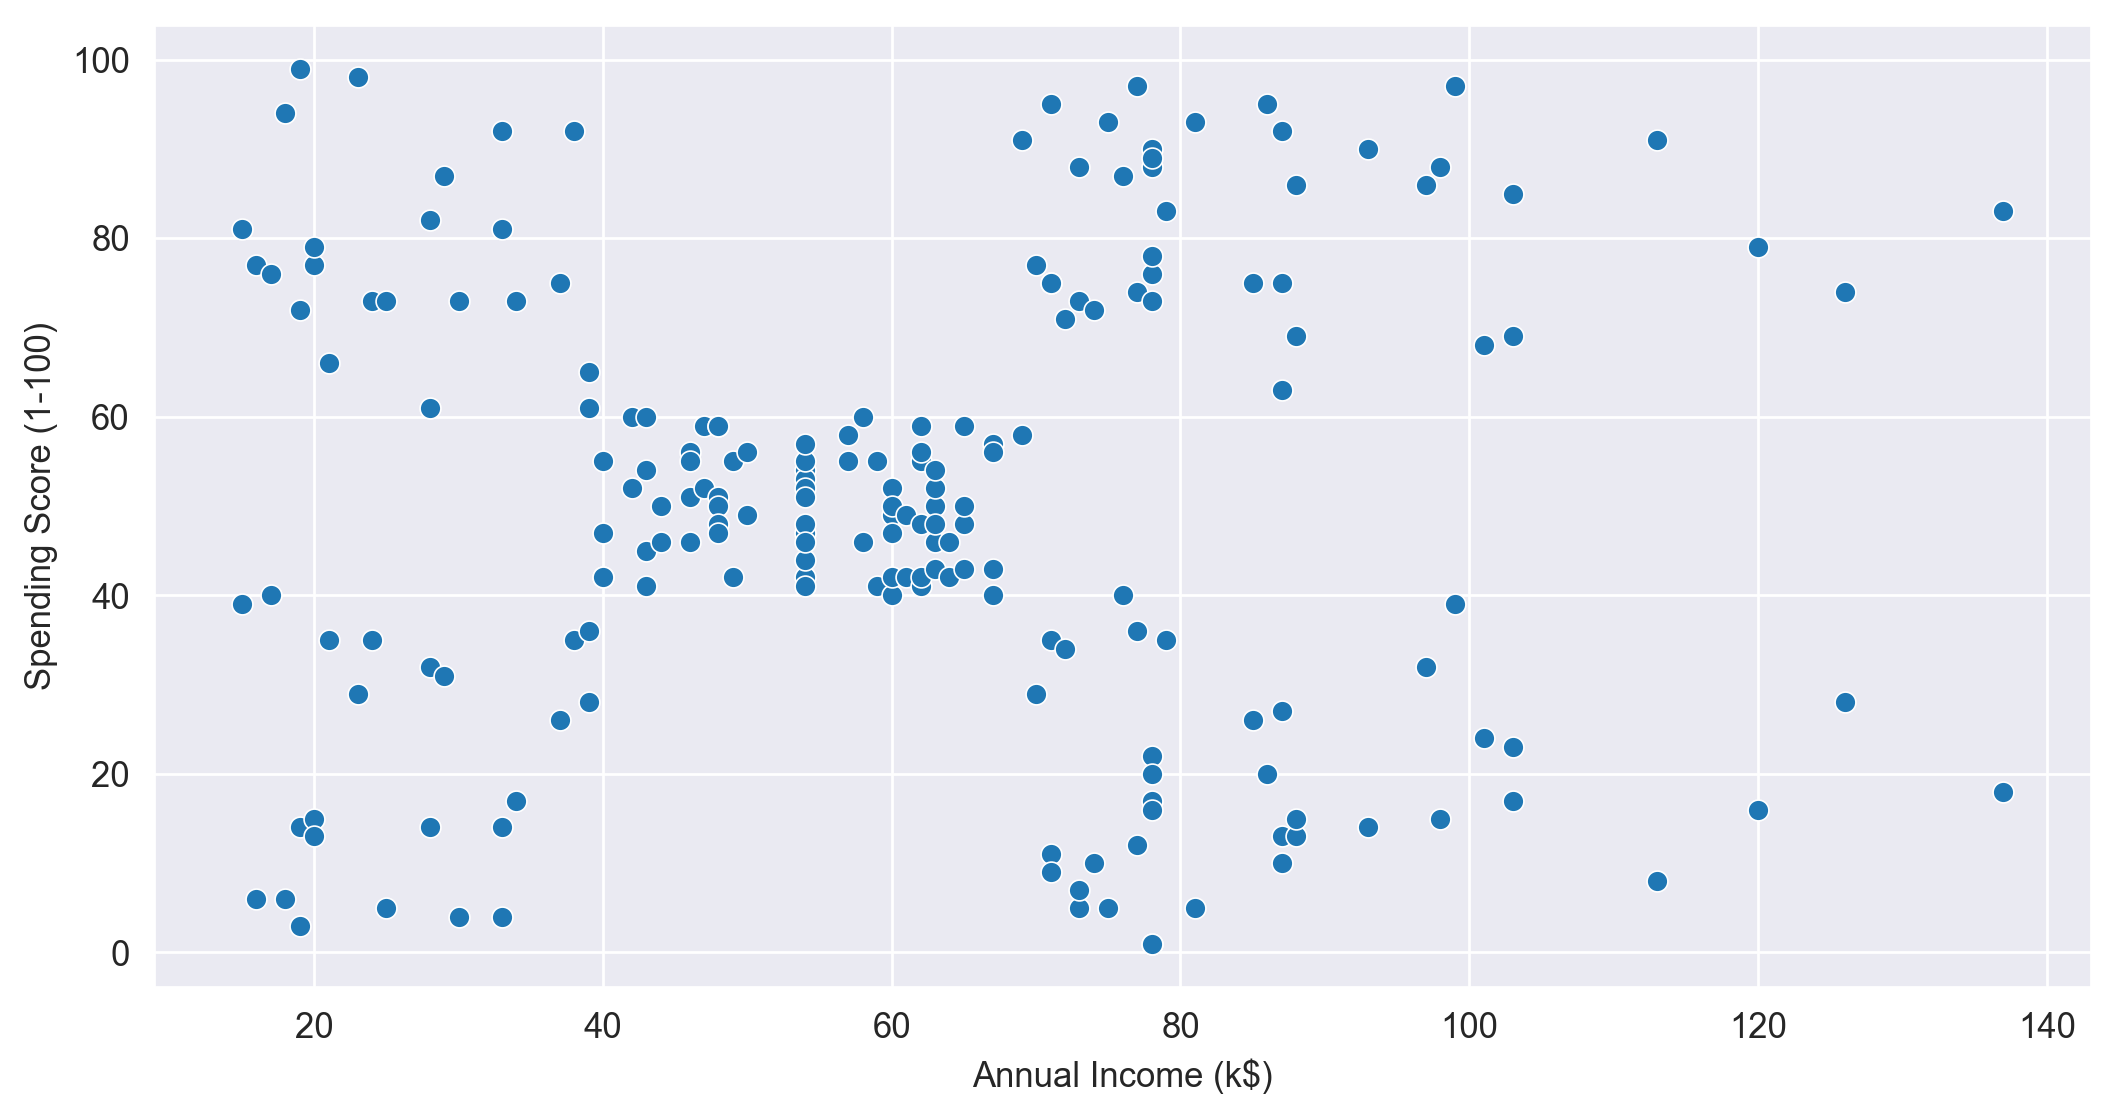

In [5]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [6]:
#Standardization
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [4]:
#Model Building

In [8]:
km = KMeans()
y = km.fit_predict(x)

In [9]:
#cluster centre
km.cluster_centers_

array([[-1.35185213, -1.19089759],
       [ 0.07722948, -0.11290604],
       [ 0.68673384,  1.241219  ],
       [ 0.73205646, -1.42897101],
       [-1.35921337,  1.19570407],
       [ 1.87564575, -1.09476801],
       [ 1.87564575,  1.23452563],
       [-0.57434225,  0.05096574]])

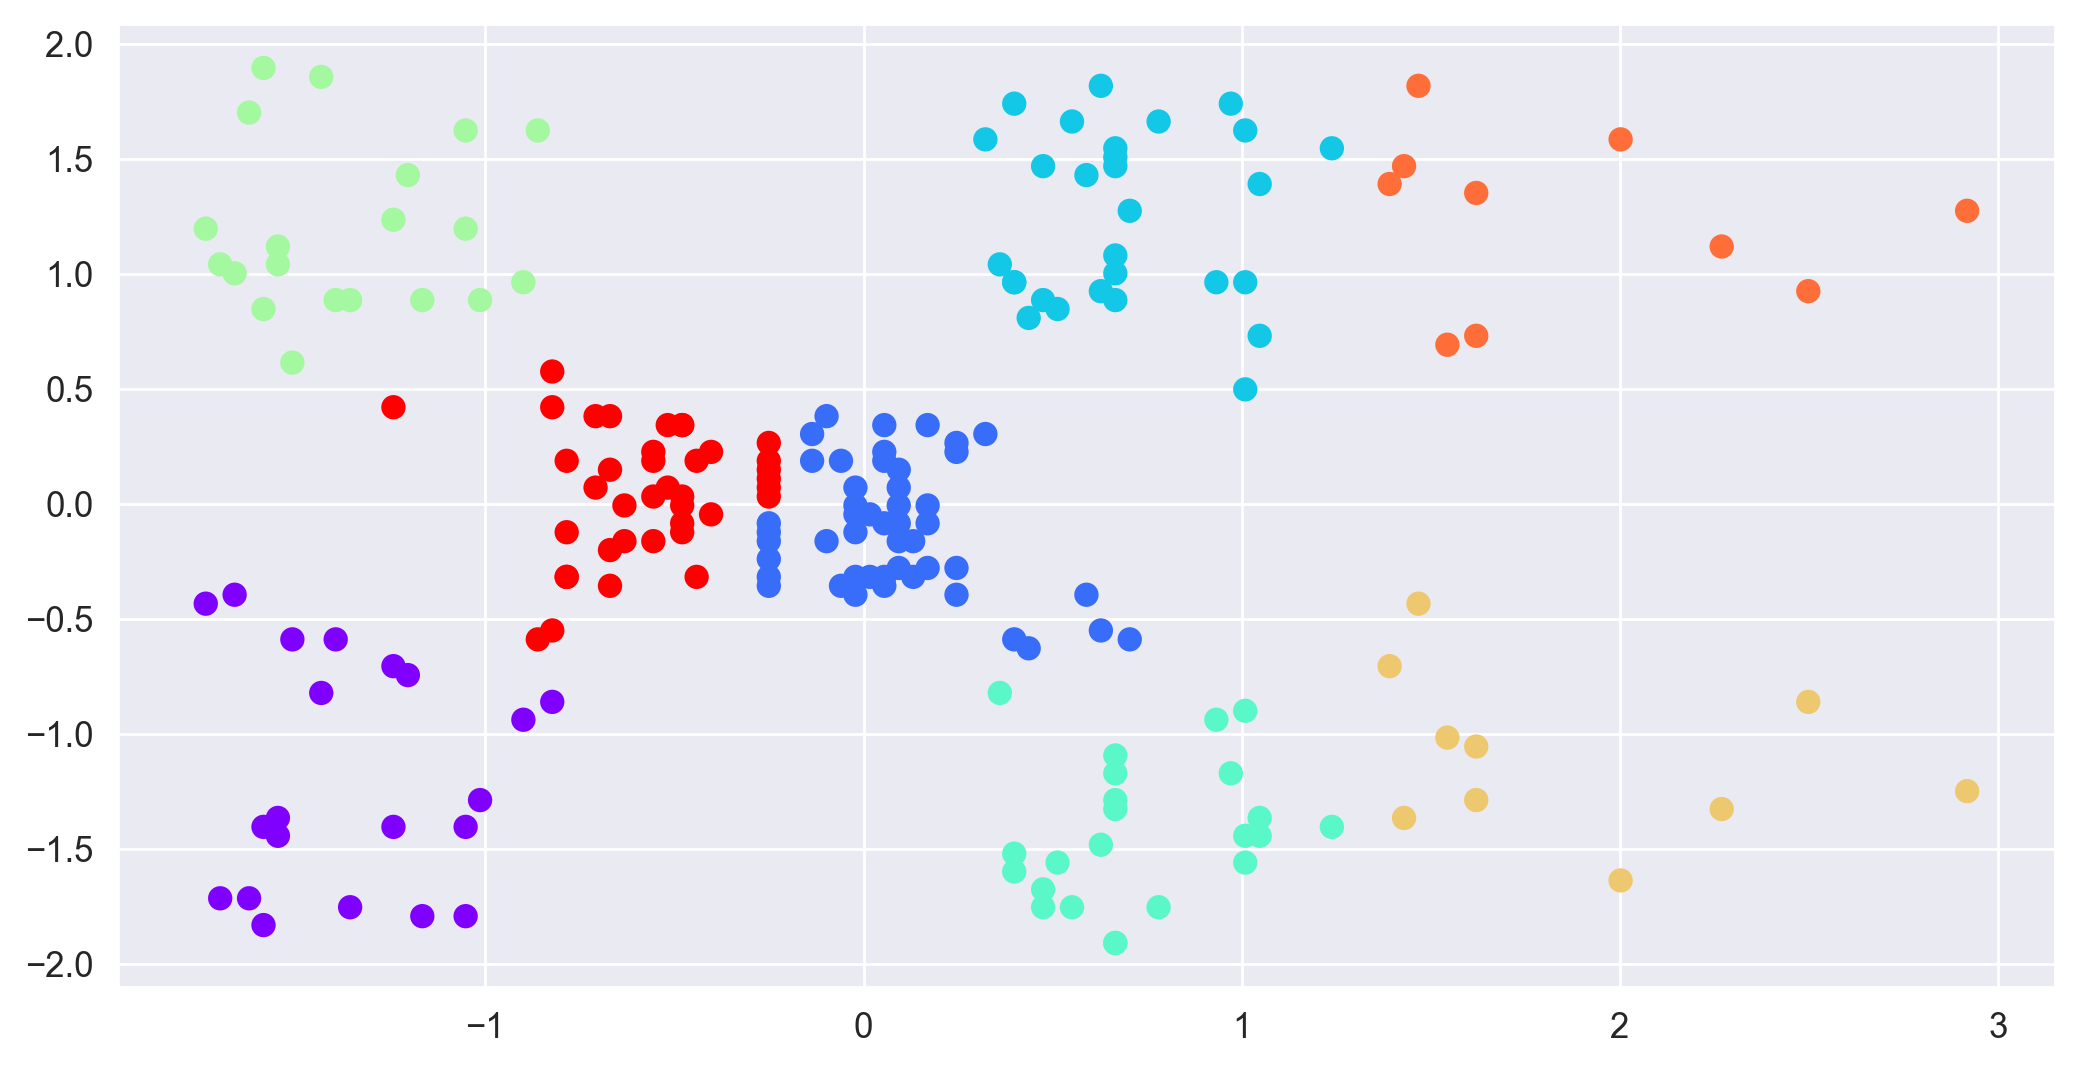

In [12]:
#Visualize the clusters
plt.scatter(x[:,0],x[:,1],c = y, cmap='rainbow')

In [13]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(x,y)

0.4541279523637649

# Elbow graph 

In [18]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [19]:
wcss

[400.0,
 270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.91118554999014,
 37.18292537017849,
 32.448651348336334,
 29.196960271419915,
 26.00028659324269,
 23.427791995869043,
 21.162943656049165,
 19.359279968212014,
 17.61584277785944,
 16.160189363350593,
 14.73028376659434,
 14.190312990291522,
 12.557283002420366]

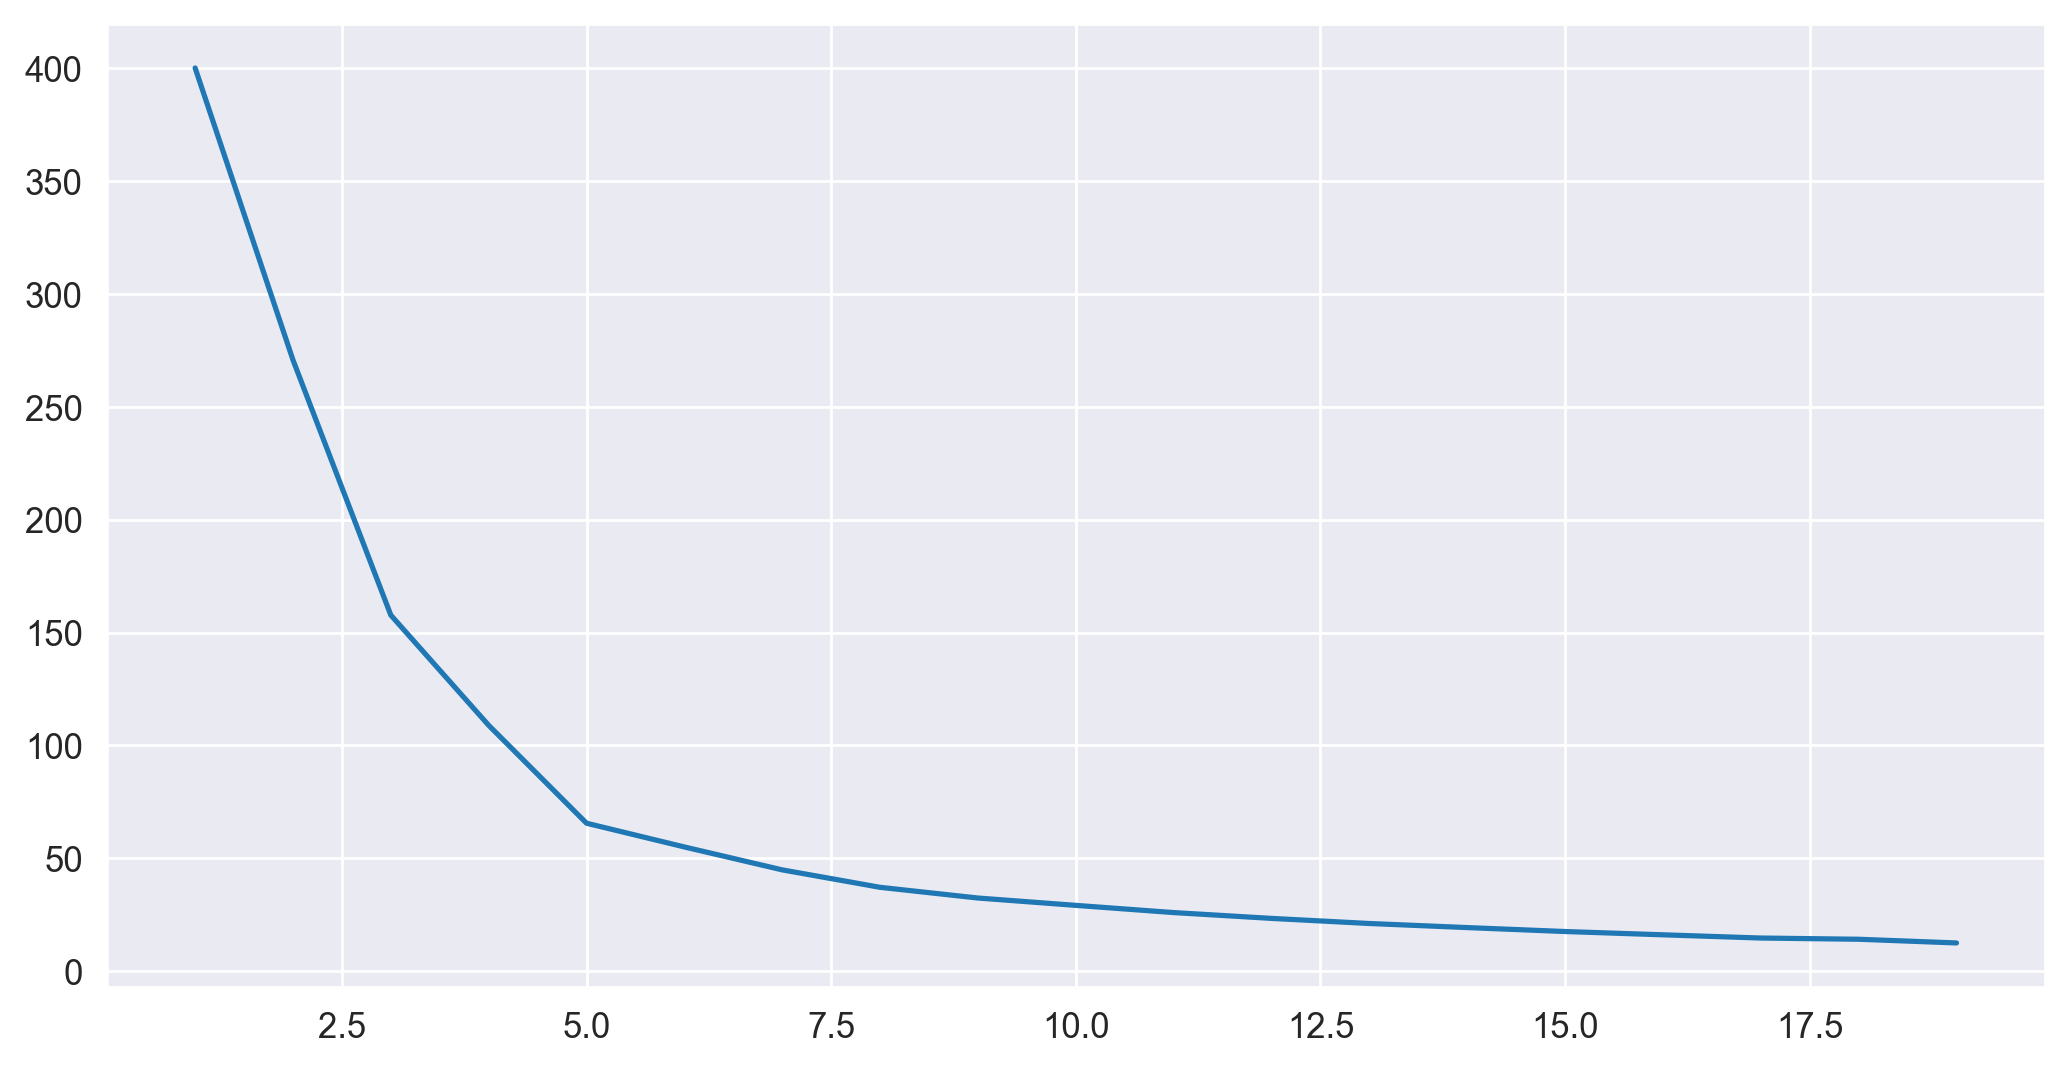

In [20]:
plt.plot(range(1,20),wcss)

# Final Model

In [21]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

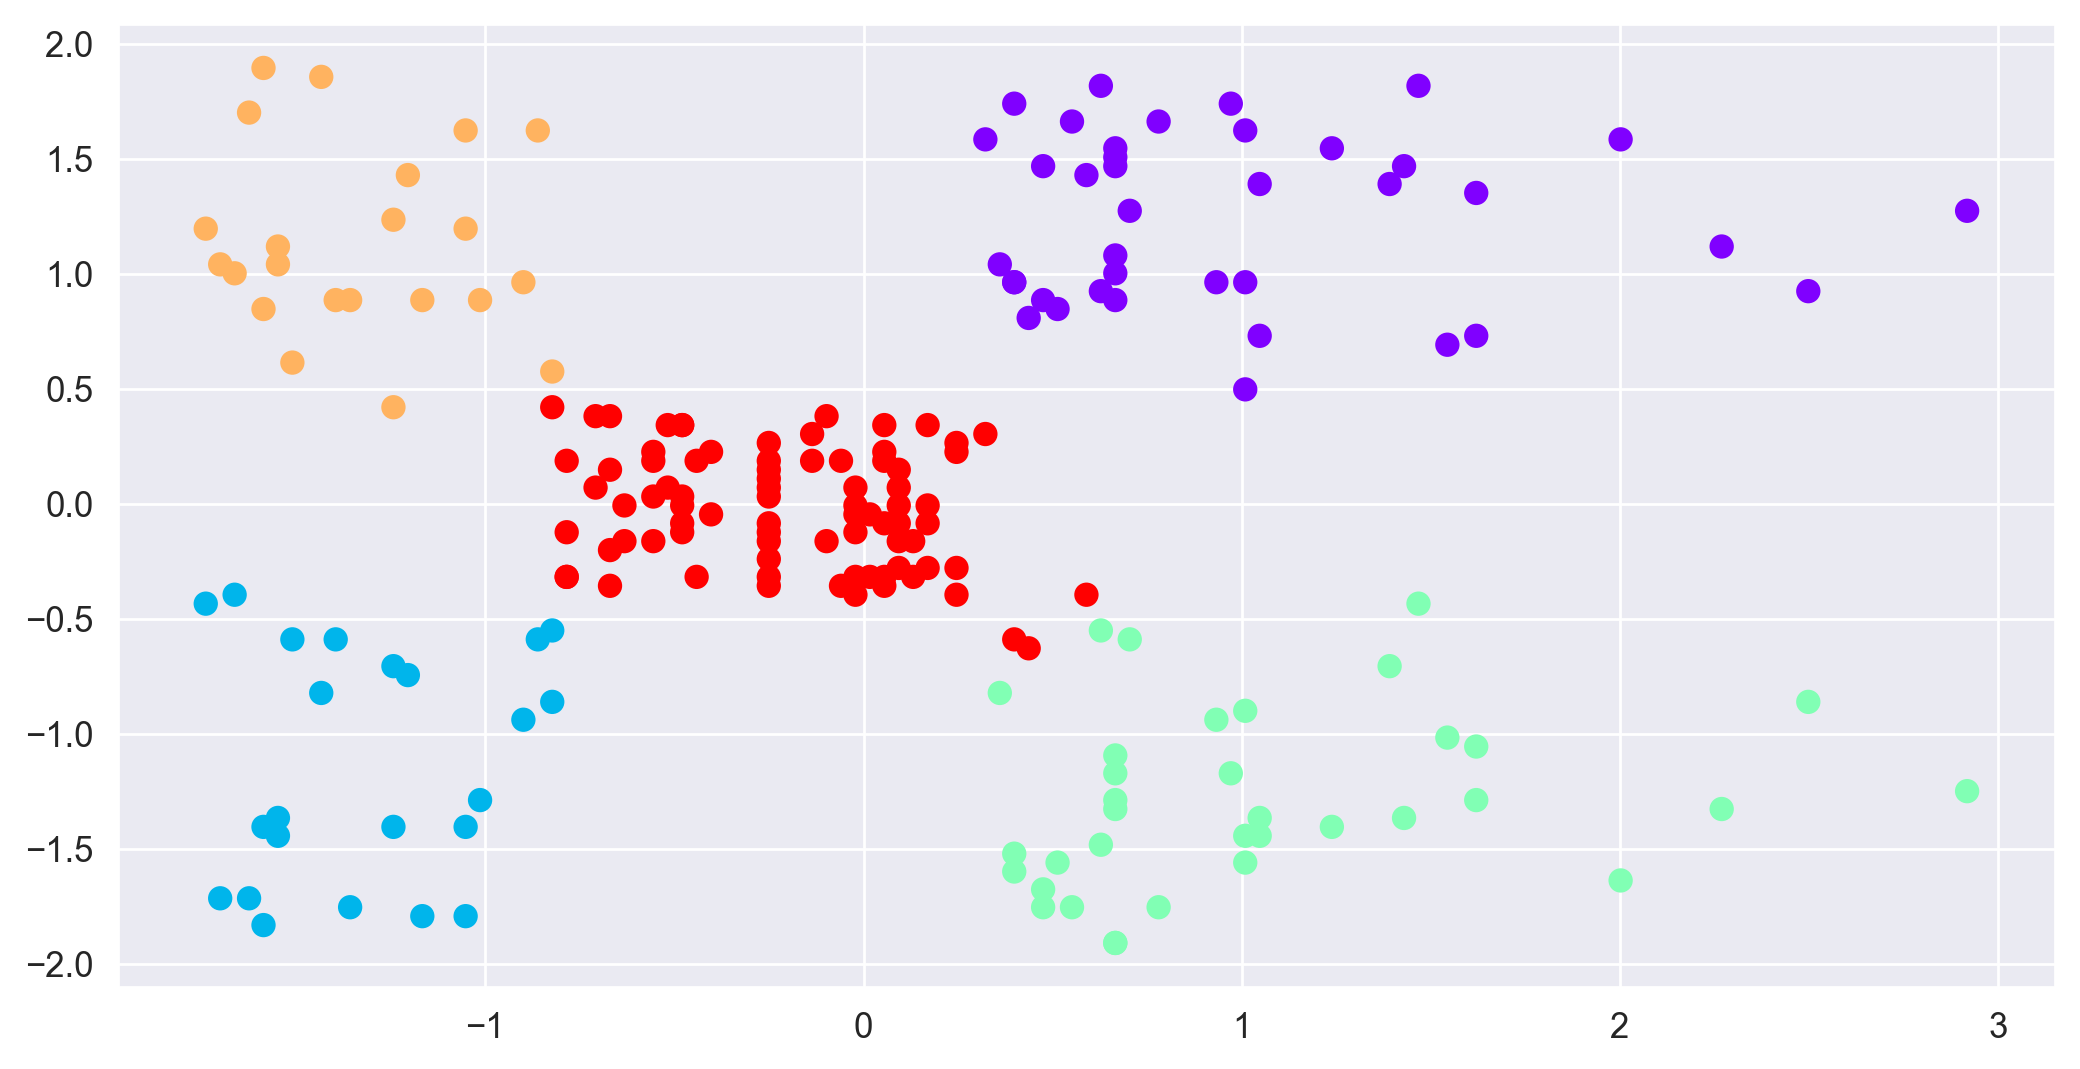

In [22]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')

In [23]:
km.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617]])

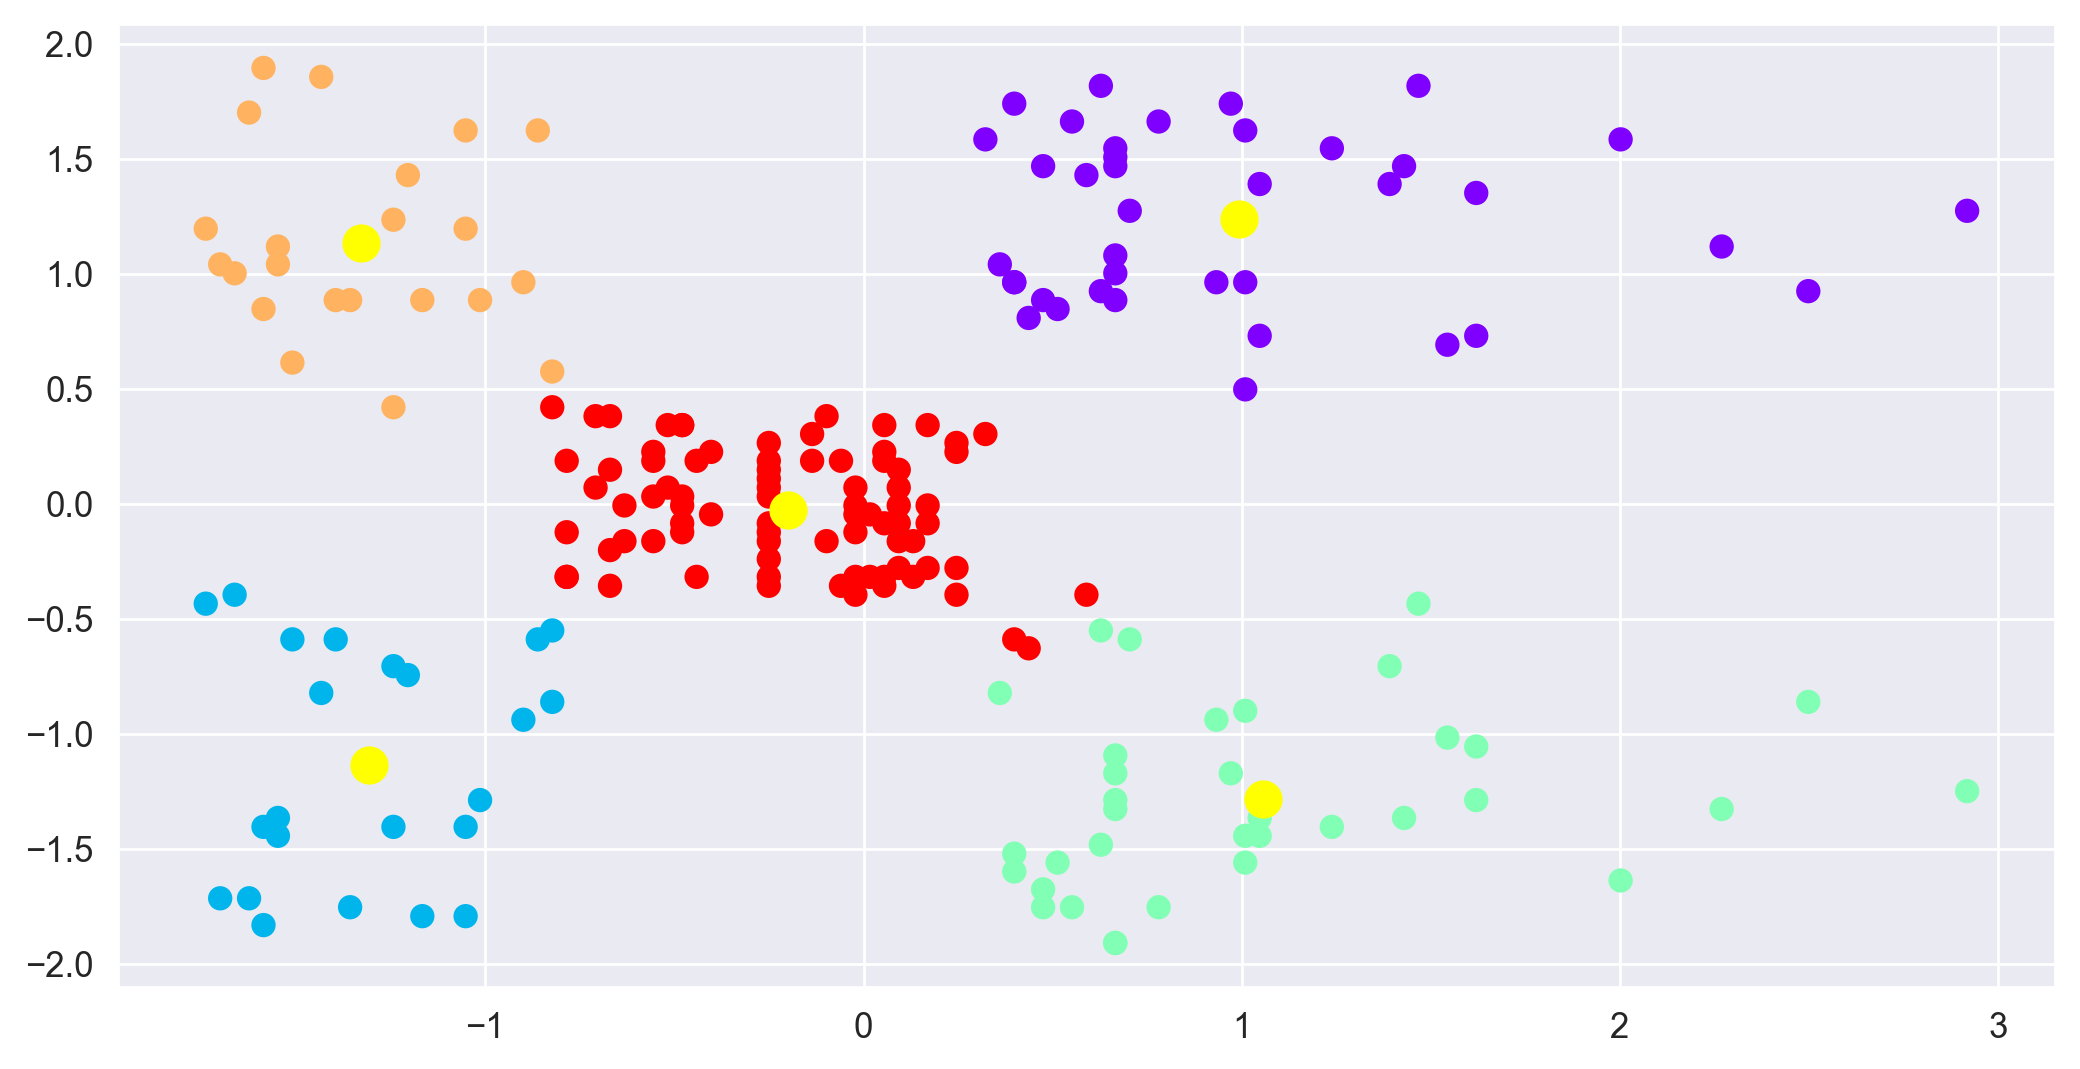

In [25]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=100)

In [27]:
silhouette_score(x,ypred)

0.5546571631111091

# Evaluation of Kmeans

<code> **STEP 1:** </code>
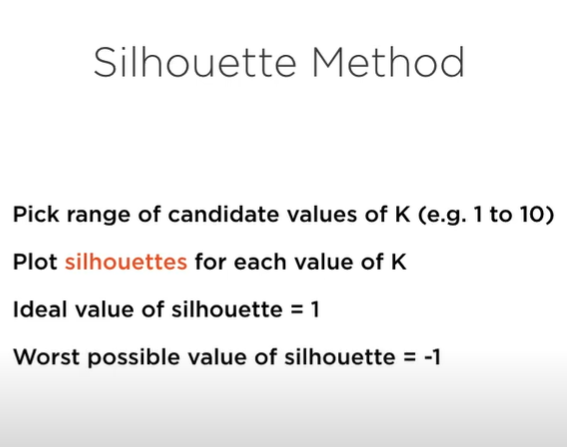


<code>**STEP 2**</code>
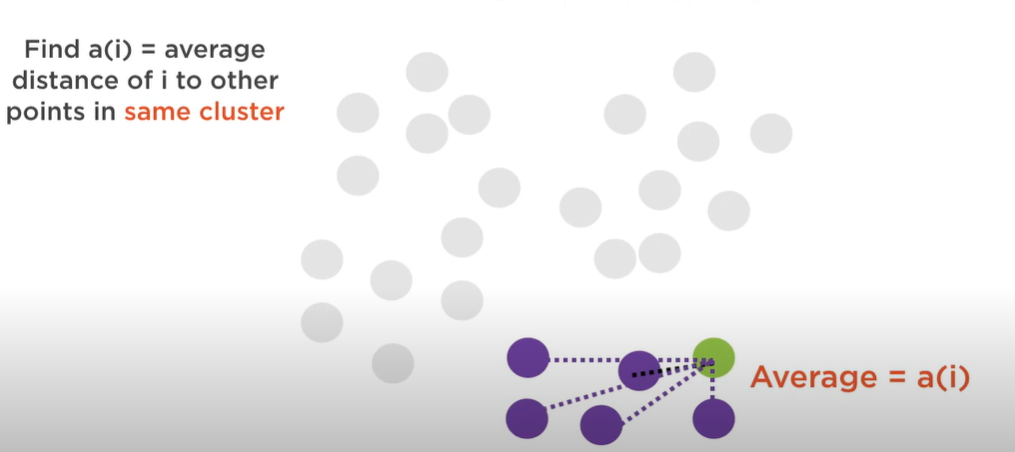

<code>**STEP 3**</code>
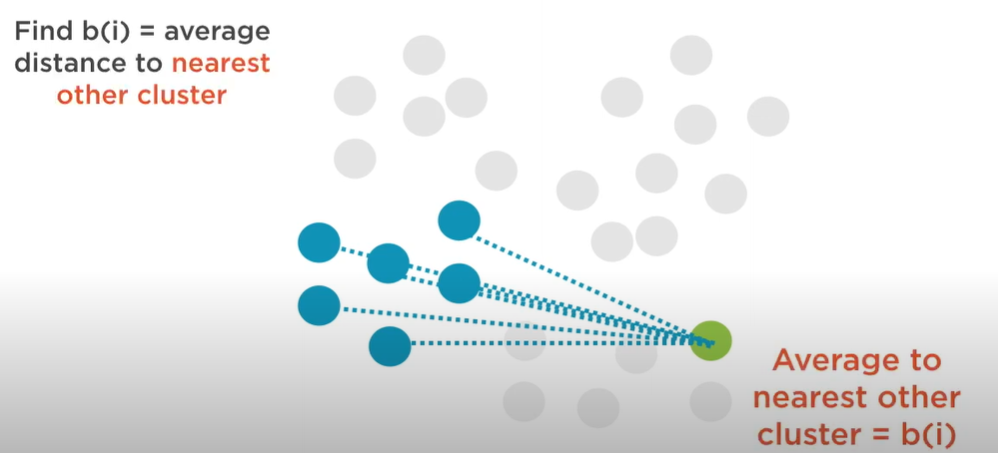

<code>**STEP 4:** </CODE>
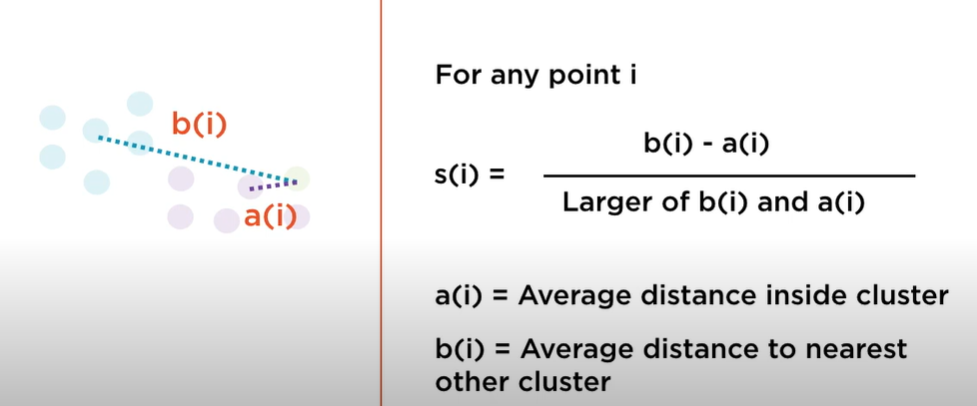

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

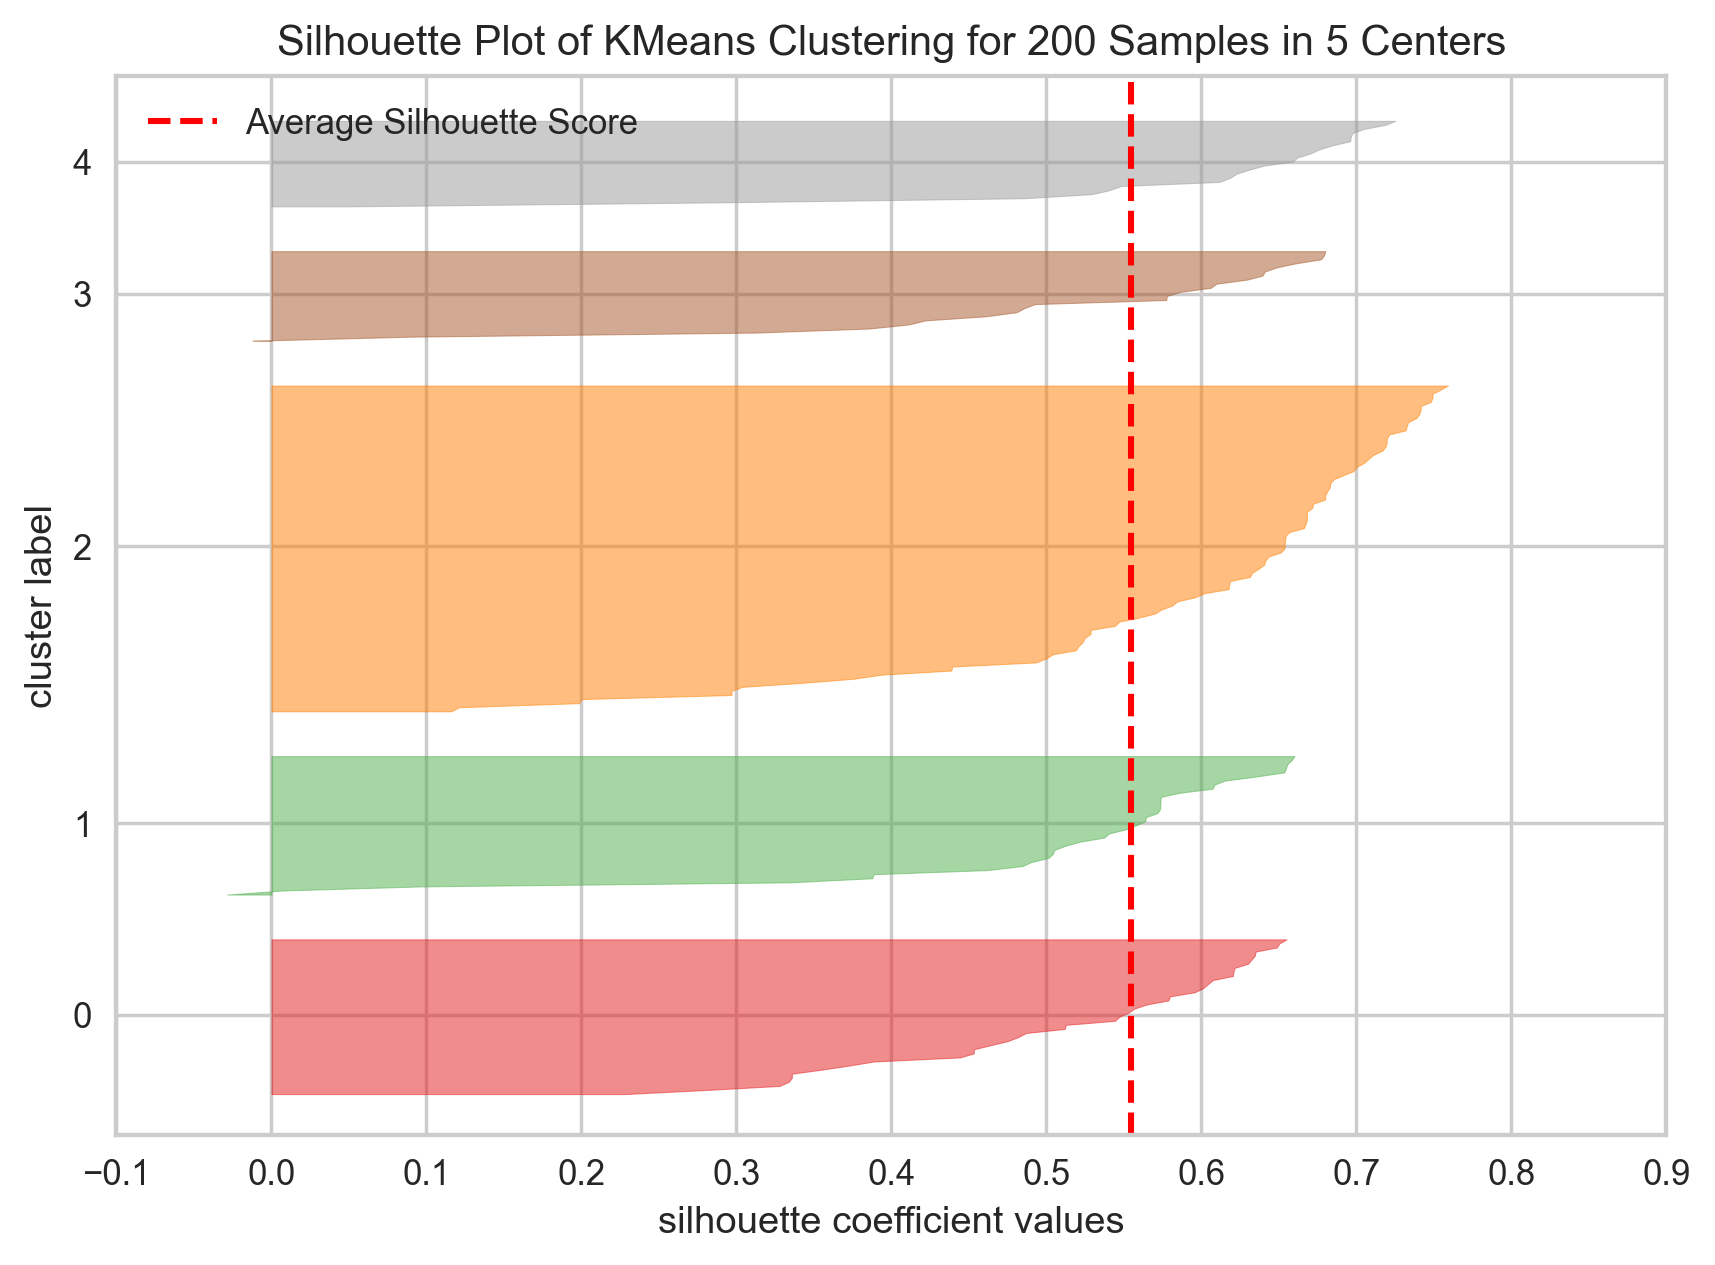

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
model = SilhouetteVisualizer(KMeans(n_clusters=5))
vis = model.fit(x)
vis.show()

In [31]:
sil_score = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

In [32]:
sil_score

[0.3212707813918878,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5394911417553498,
 0.5263454490712252,
 0.4541279523637649,
 0.45532159949822093,
 0.43515113681540685,
 0.4445617189101986,
 0.4326495718824813,
 0.4242729421933198,
 0.4232295361992216,
 0.425782708111636,
 0.42413860404869114,
 0.4122752969577338,
 0.41655878076277,
 0.4196835381899862]

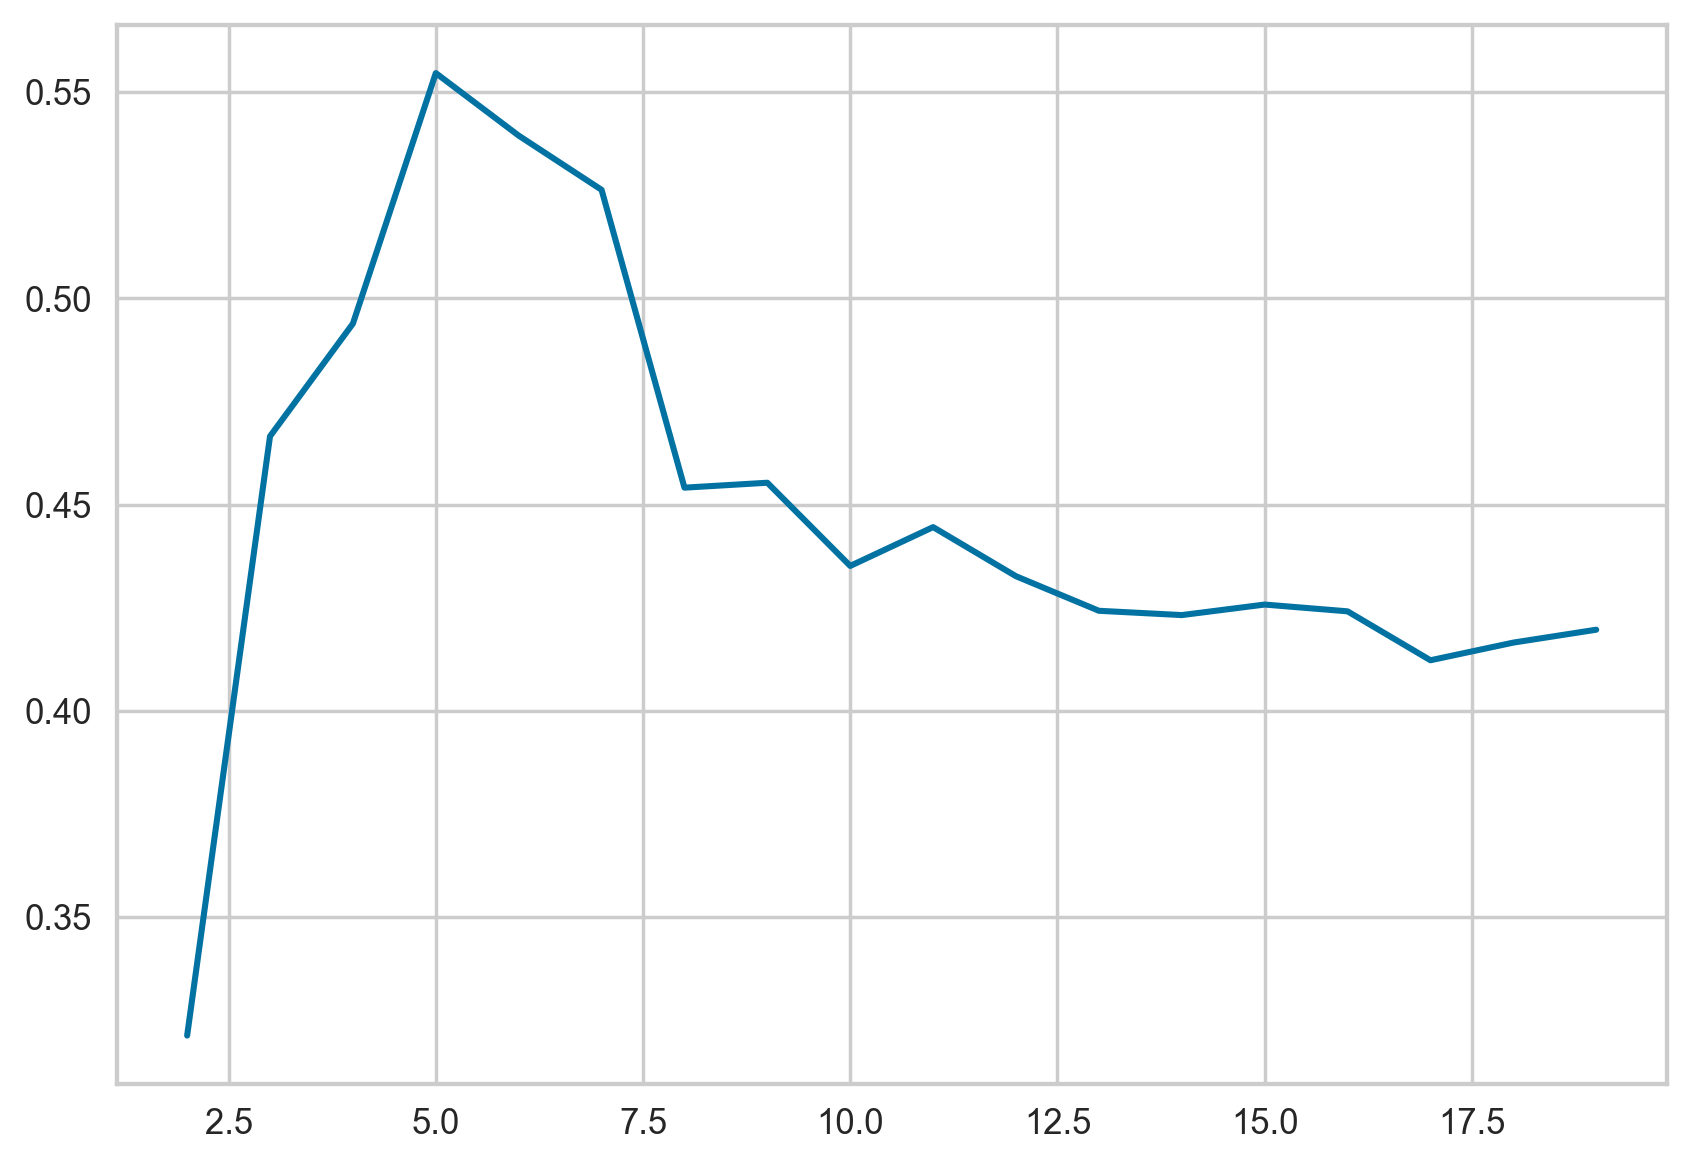

In [33]:
plt.plot(range(2,20),sil_score)

In [35]:
df['cluster'] = ypred
df

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,1
2,15,81,3
3,16,6,1
4,16,77,3
5,17,40,1
...,...,...,...
196,120,79,0
197,126,28,2
198,126,74,0


In [36]:
df.groupby('cluster').agg('mean')

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,86.538462,82.128205
1,26.304348,20.913043
2,88.200000,17.114286
3,25.727273,79.363636
4,55.296296,49.518519
